In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values in thedataset

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

the dataset has 768 records and 9 columns

1.Pregnancies=Nomber of preganat patients.
2.Glucose=Plasma glocose concentration in oral glucose test.
3.Blood pressure= Blood pressure.
4.Skin thickness= Thickness of the skin fold.
5.Insulin=Serum INsulin
6.BMI=Body Mass INDEX(weight/height)
7.DiabetesPedigreeFunction
8.Age=Age(years)
9.Outcome=1 indicates presence of diabetes 0 indicates absense





In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


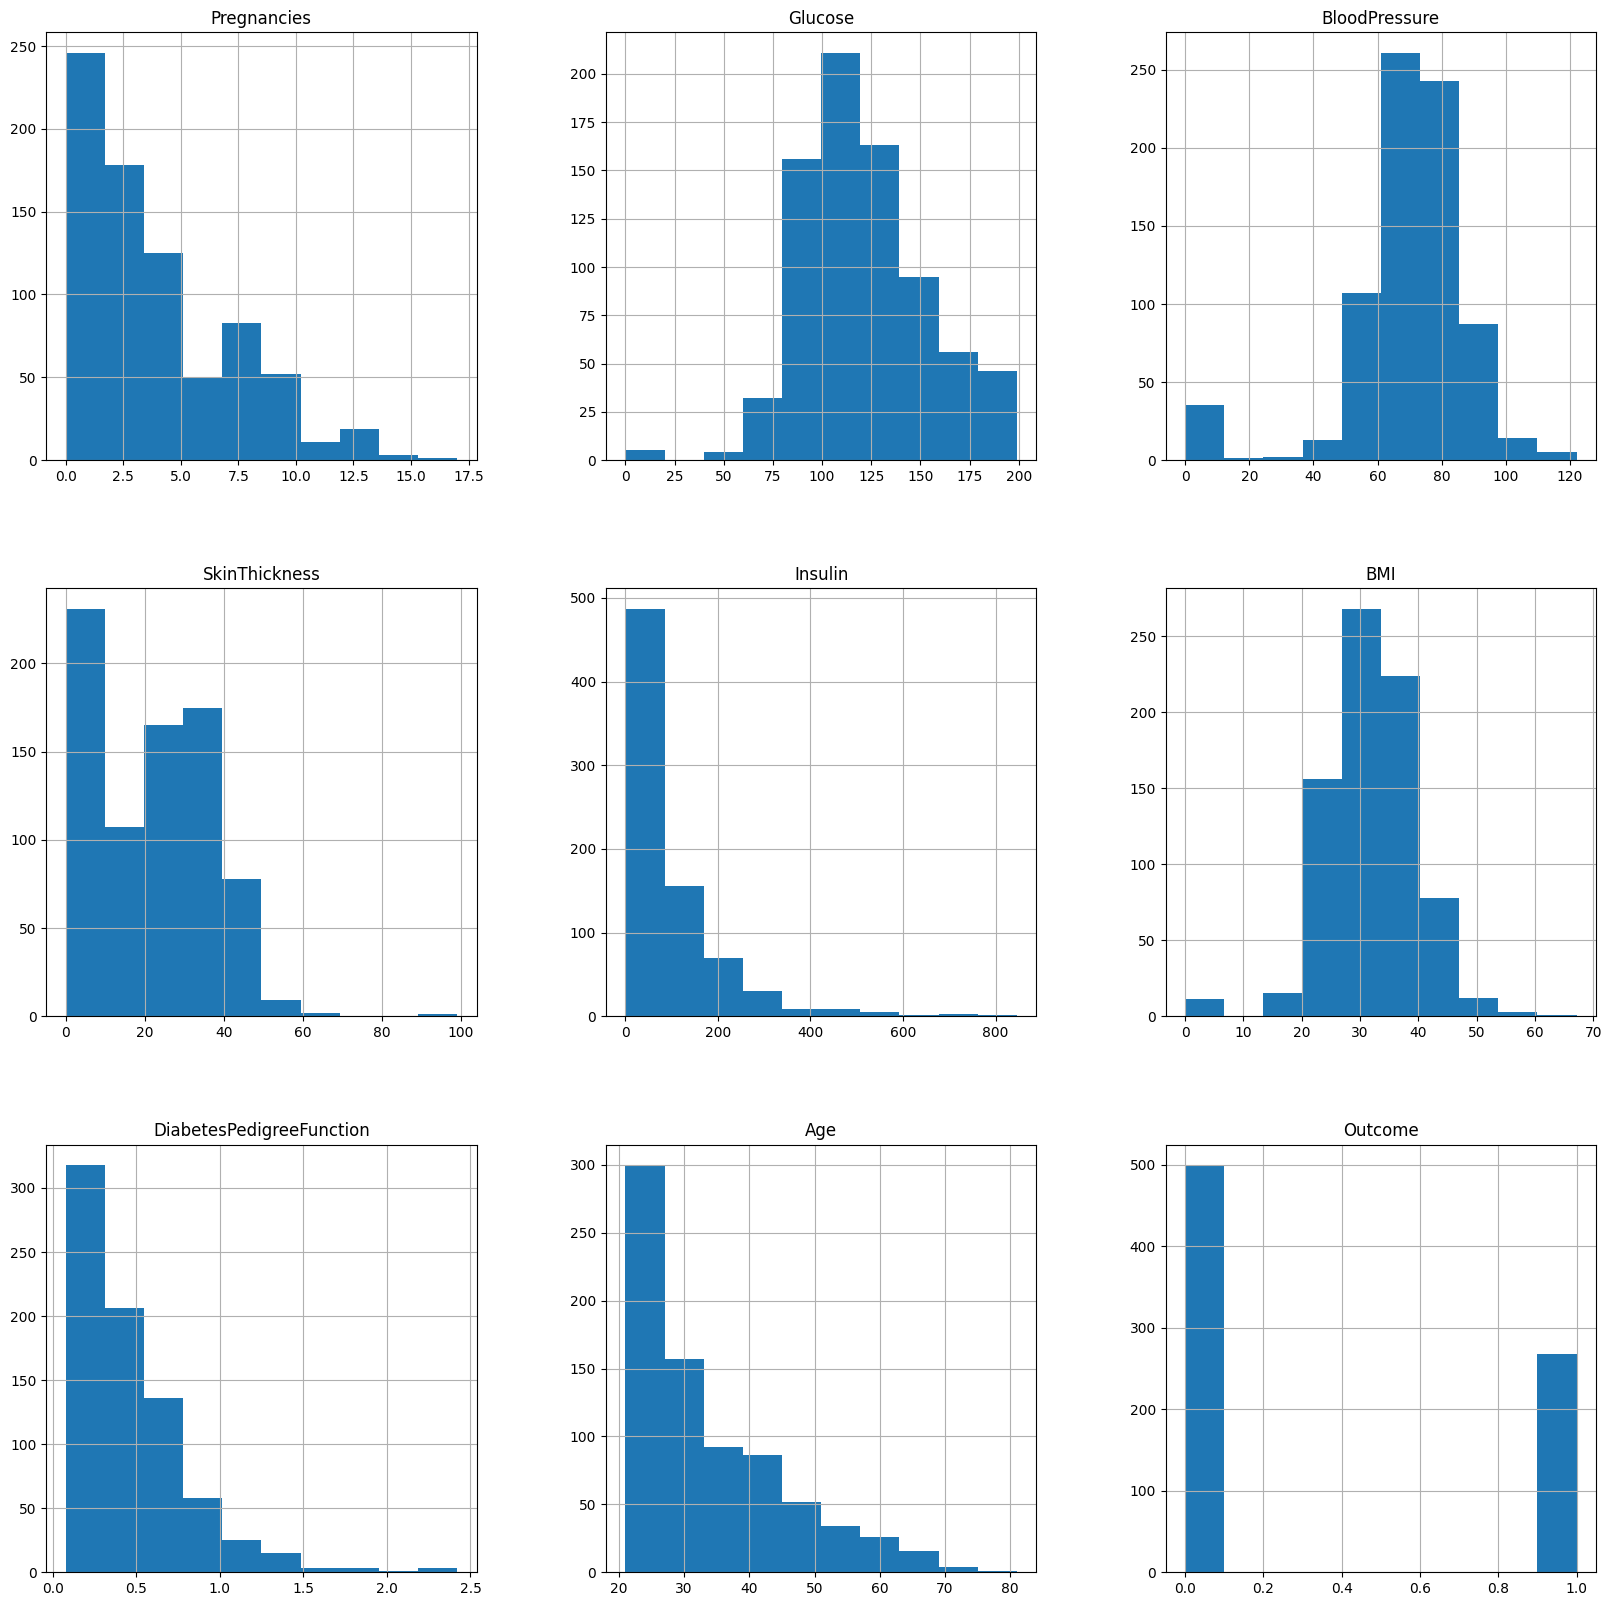

In [ ]:
# Data distribution plots
p = df.hist(figsize = (20, 20))

In [ ]:
# Replacing NaN with mean and median values
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']] = df_copy[['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.NaN)


In [ ]:

df_copy["Glucose"].fillna(df_copy["Glucose"].mean(), inplace = True)
df_copy["BloodPressure"].fillna(df_copy["BloodPressure"].mean(), inplace = True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].median(), inplace = True)
df_copy["Insulin"].fillna(df_copy["Insulin"].median(), inplace = True)
df_copy["BMI"].fillna(df_copy["BMI"].median(), inplace = True)

In [ ]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

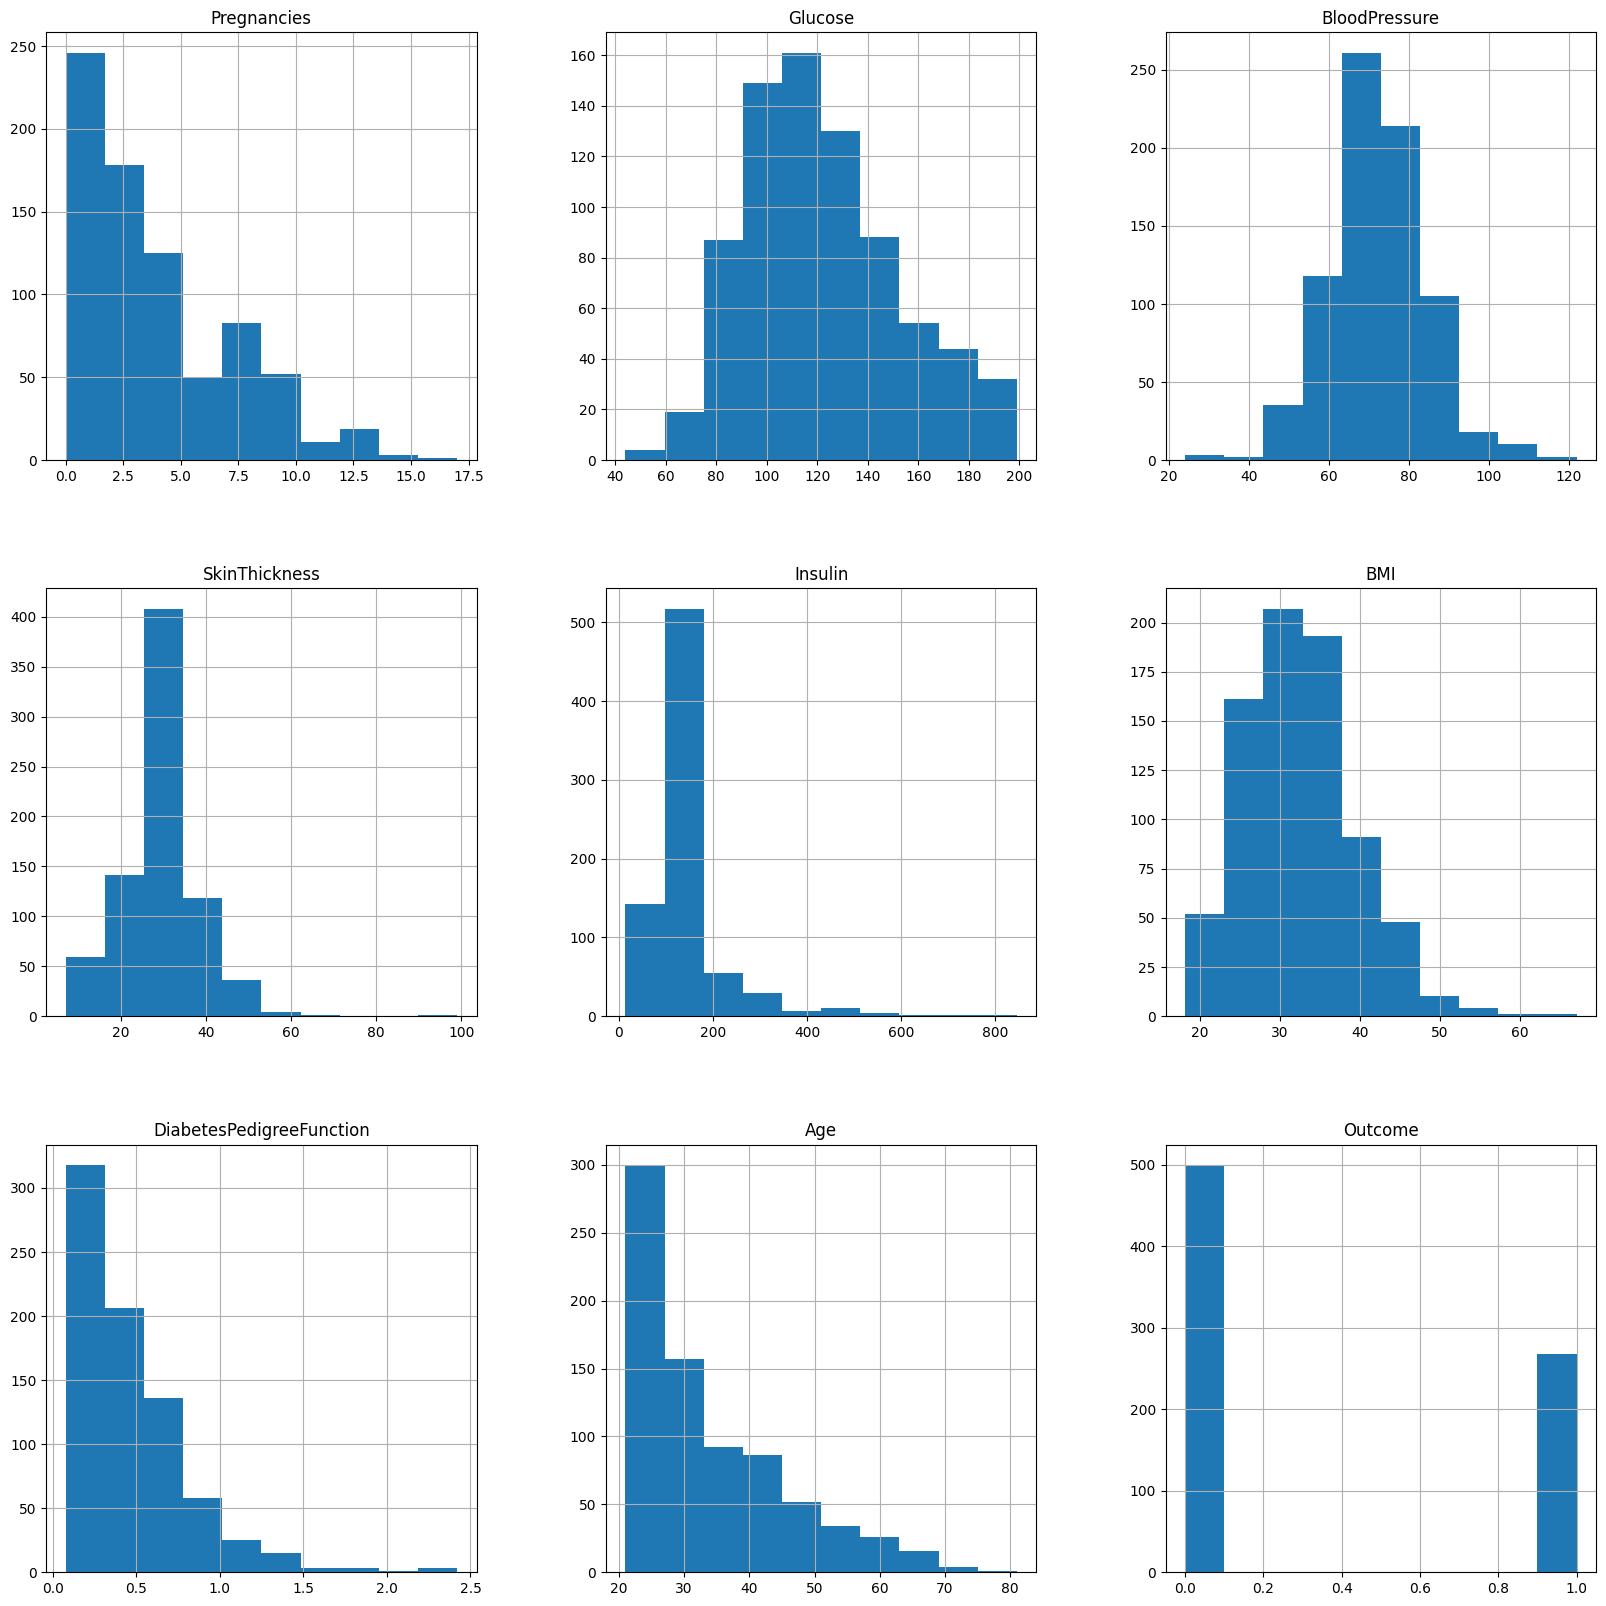

In [ ]:
# Plotting the distribution after removing the NAN values
plot = df_copy.hist(figsize = (20,20))


In [ ]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
Outcome_counts=df_copy['Outcome'].value_counts(normalize=True)
Outcome_counts

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

65% are nondiabetes and 34% are diabetes


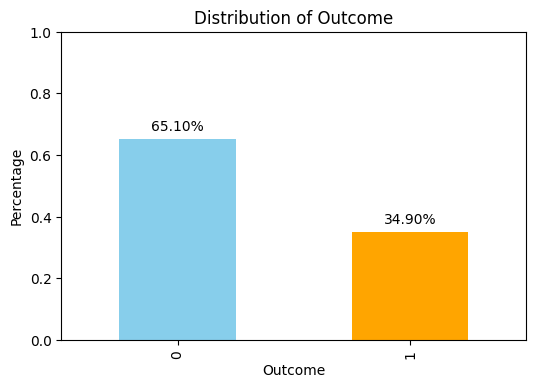

In [ ]:
# Create a bar plot
plt.figure(figsize=(6, 4))
Outcome_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.ylim(0, 1)  # Set the y-axis limit to 0-100%

# Display the percentage values on top of each bar
for index, value in enumerate(Outcome_counts):
    plt.text(index, value + 0.02, f'{value*100:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

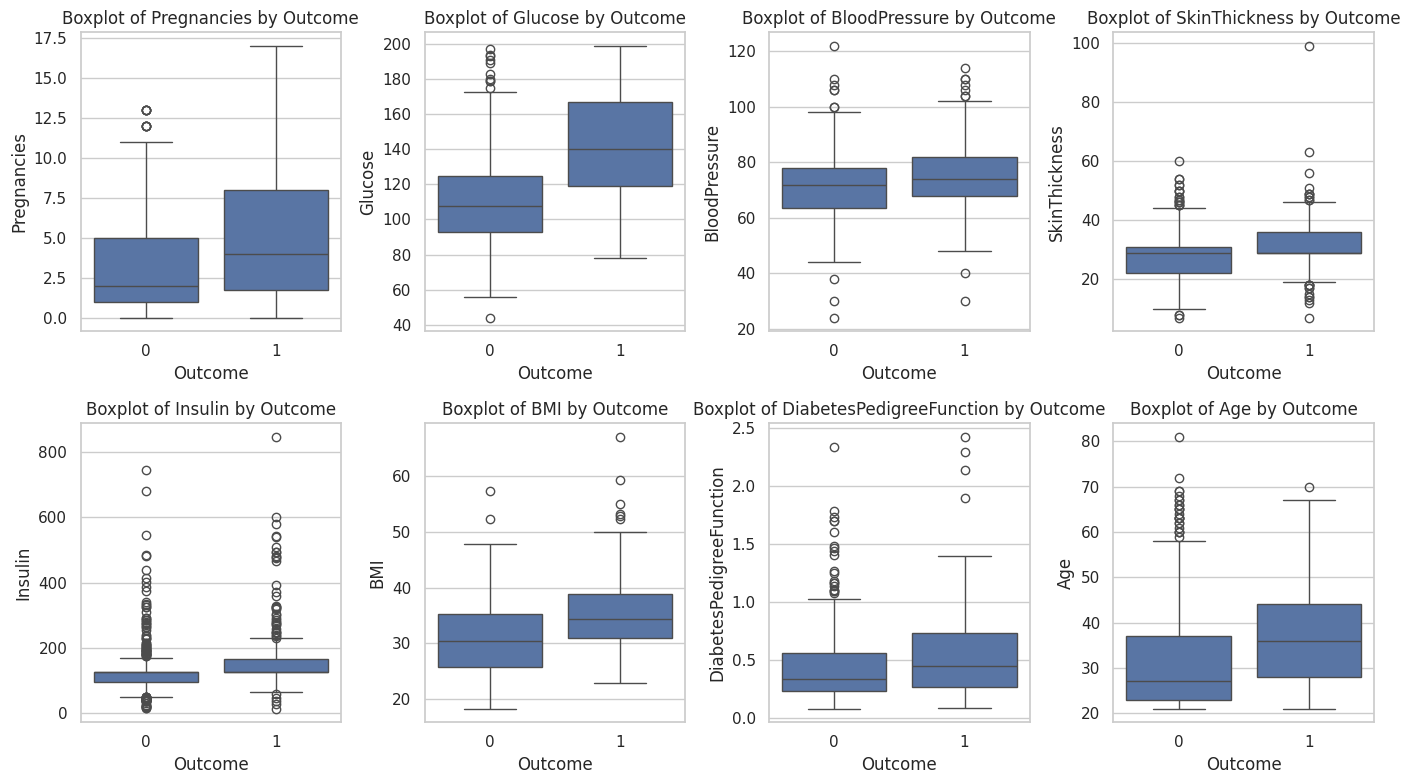

In [ ]:
# Boxplot for each variable grouped by Outcome
plt.figure(figsize=(14, 8))
for i, column in enumerate(df_copy.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=column, data=df_copy)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()


BOX PLOT SHOWING THAT-
- **Pregnancies**: Diabetic women tend to have a higher median number of pregnancies.
- **Glucose**: Higher median glucose levels are observed in diabetic pregnancies.
- **Blood Pressure & Skin Thickness**: Both show similar distributions but slightly higher values in diabetic pregnancies.
- **Insulin**: A significant increase in insulin levels is noted in diabetic pregnancies.
- **BMI (Body Mass Index)**: Higher median BMI values are associated with diabetic pregnancies.
- **Diabetes Pedigree Function**: Diabetic women have a higher median value indicating a family history of diabetes.
- **Age**: Older age is associated with diabetic pregnancy.


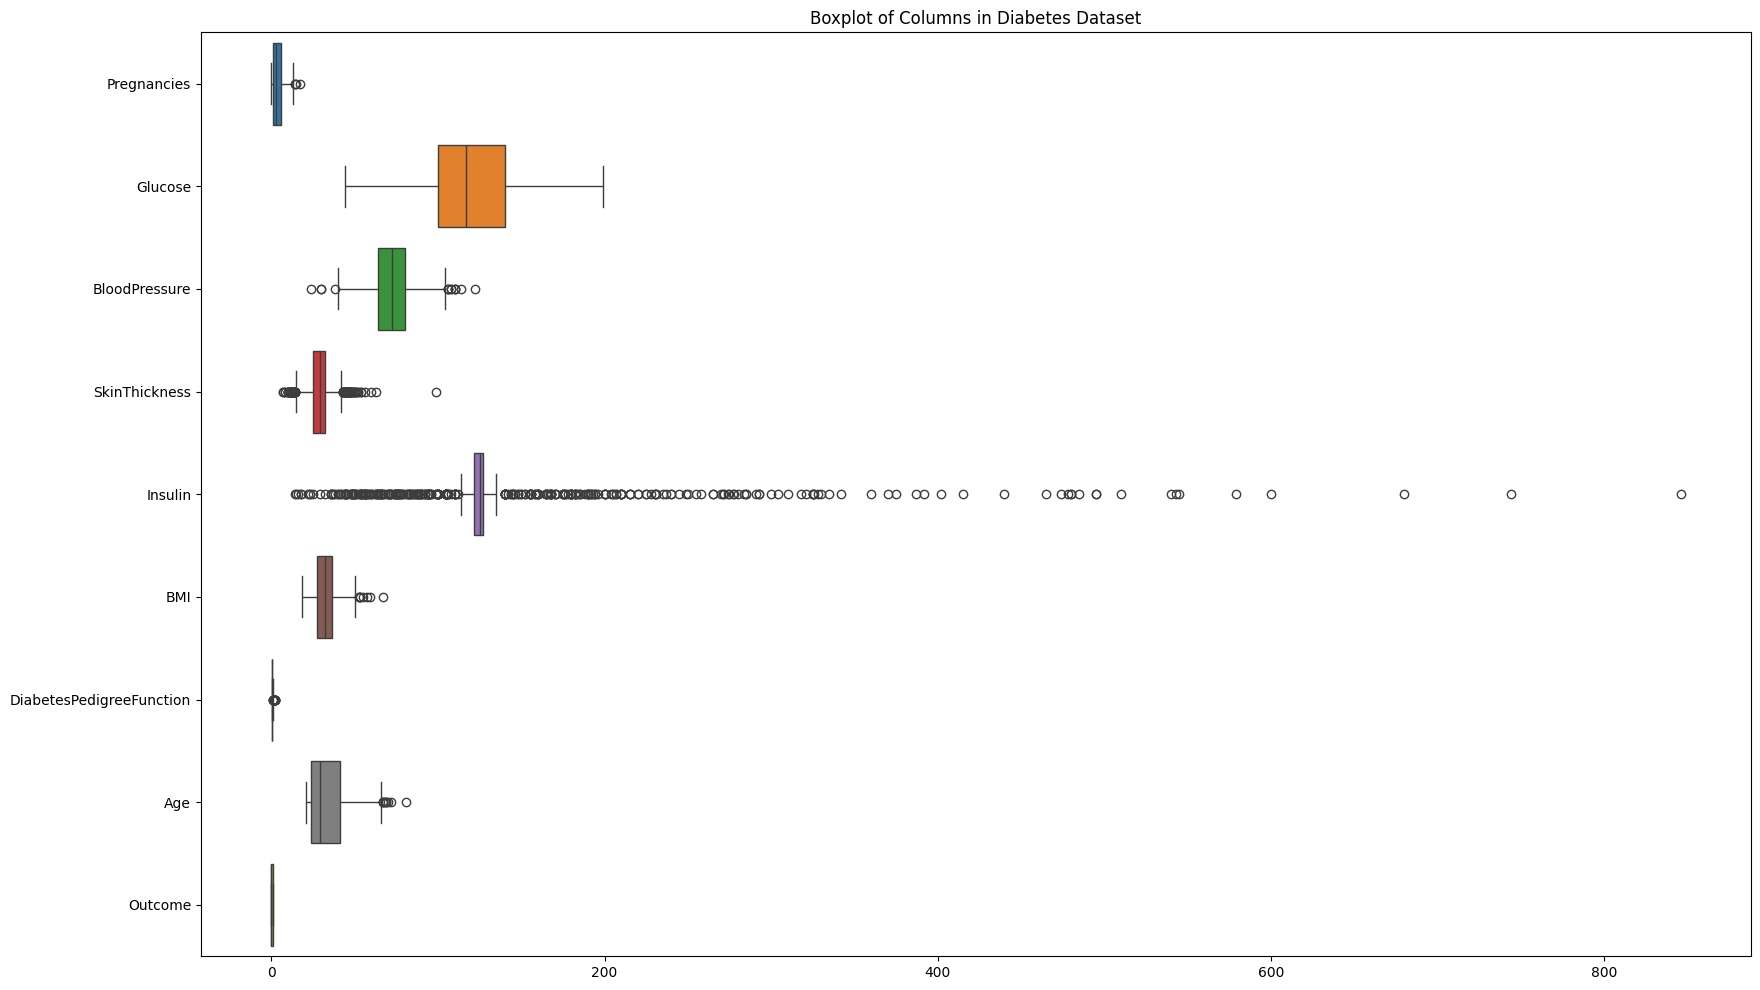

In [ ]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df_copy,orient="h")
plt.title('Boxplot of Columns in Diabetes Dataset')
plt.show()

In [ ]:
cor=df_copy.corr(method="pearson")
cor


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

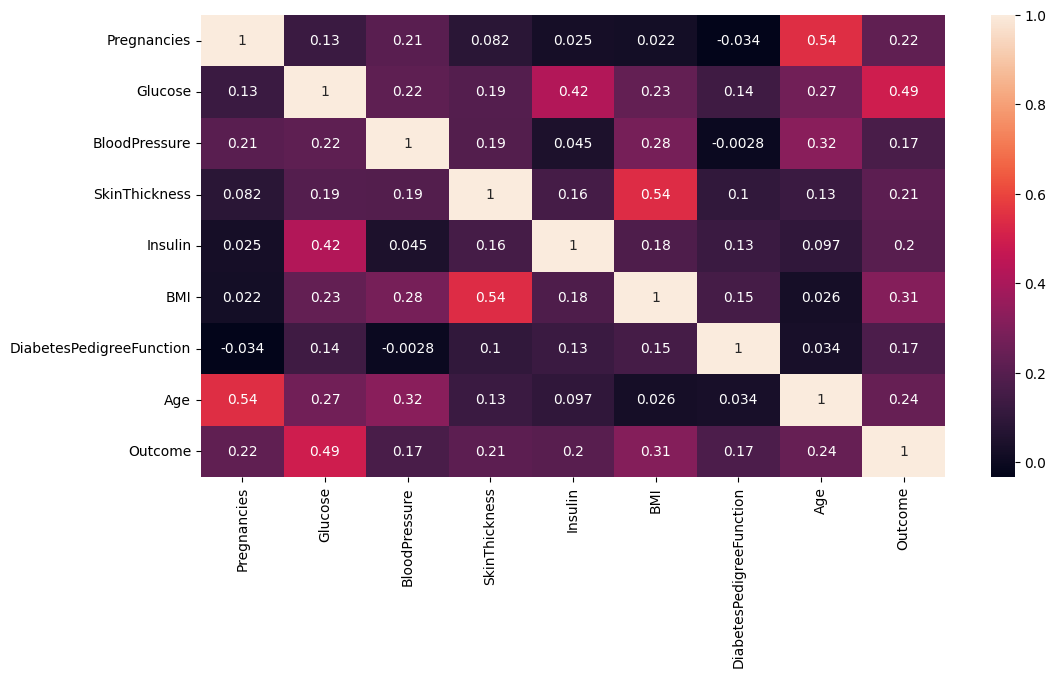

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap (cor, annot=True)

correlation closer to -1 we can see in the heatmap visulization.A correlation coefficient close to -1 indicates a strong negative linear relationship.As one variable increases, the other variable decreases.
Age and preganancie positively correlated.
Glucose and Insulin positively correlated.
BMI and Age positively correlated.

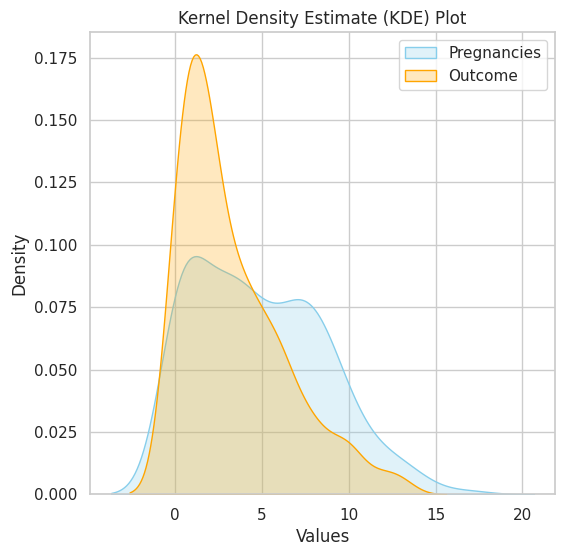

In [ ]:
#Relation between pregnancy and Diabetes

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

# Create a KDE plot for 'Pregnancies'
g=sns.kdeplot(df_copy['Pregnancies'] [df ['Outcome'] == 1], fill=True, color='skyblue', label='Pregnancies')

# Create a KDE plot for 'Outcome'
sns.kdeplot(df_copy['Pregnancies'] [df ['Outcome'] == 0], fill=True, color='orange', label='Outcome')

plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

**So from above visulization I can see that non diabeties are morediabetic pregnant women are less**



In [ ]:
#to check the outliers
for feature in df_copy:
  q1 = df_copy[feature].quantile(0.25)
  q3 = df_copy[feature].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  if df[(df[feature] > upper)].any(axis= None):
    print(feature, "yes")
  else:
      print(feature, "no")


Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [ ]:
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x = scale_x.fit_transform(df_copy.drop(['Outcome'],axis = 1))
x = pd.DataFrame(x, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y=df_copy['Outcome']#targetvariable

The datset is look like this when it scaled down.The StandardScaler is applied independently to each feature, and it scales the features such that they have zero mean and unit variance. This can be important for certain machine learning algorithms that are sensitive to the scale of the input features. Standardizing the features ensures that each feature contributes approximately equally to the similarity or distance measures used by many machine learning models.

In [ ]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


**Train test split**





In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.20,random_state=42)


In [ ]:
x_train.shape

(614, 8)

In [ ]:
df_copy.shape

(768, 9)

In [ ]:
x_test.shape


(154, 8)

In [ ]:
y = df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt_predictions = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



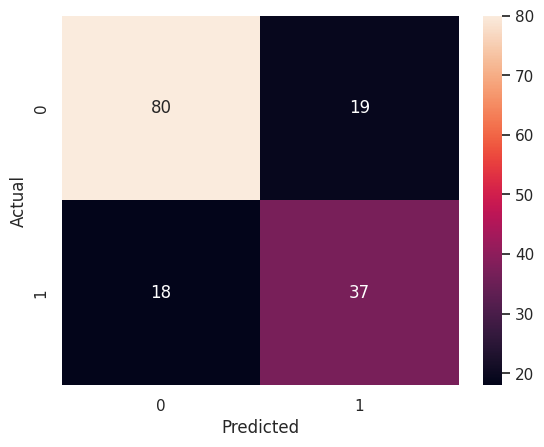

In [ ]:
# Confusion matrix for Random Forest
conf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Negatives (80): The model correctly predicted 80 instances where the pregnancy was non-diabetic (Actual=0, Predicted=0).
False Positives (19): The model incorrectly predicted 19 instances as diabetic pregnancies where the actual class was non-diabetic (Actual=0, Predicted=1).
False Negatives (18): The model incorrectly predicted 18 instances as non-diabetic pregnancies where the actual class was diabetic (Actual=1, Predicted=0).
True Positives (37): The model correctly predicted 37 instances where the pregnancy was diabetic (Actual=1, Predicted=1).


**insights**
* The most influential factor for predicting diabetes is the 'Glucose' level.

* 'BMI' and 'Age' are also critical factors that significantly contribute to predictions.